In [1]:
# Importing necessary librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import tensorflow as tf
import keras.layers as L

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../Datasets/spotify_reviews.csv')

In [3]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
df['Time_submitted'] = pd.to_datetime(df['Time_submitted'])
df['Date'] = df['Time_submitted'].apply(lambda x: x.date())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.isna().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [6]:
df['Rating'].value_counts()

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64

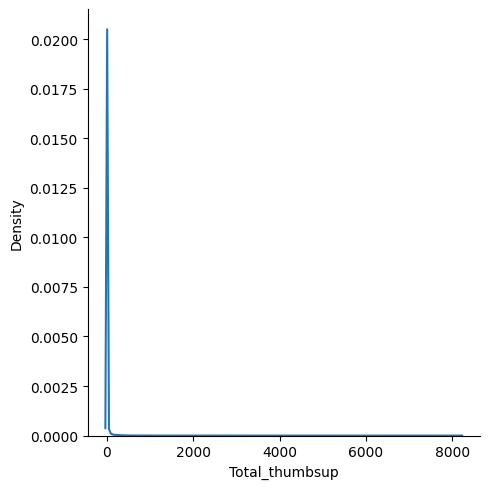

In [10]:
sns.displot(x = df['Total_thumbsup'], kind = 'kde')